#  Student Success & Wellness Simulator  
**Course:** CST2101 – Business Intelligence Programming  
**Student:** Shara Khandakar  
**Instructor:** Siju Philip  
**Date:** 1st December 2025  

---

###  Project Overview
This project simulates student study habits and wellness inputs and evaluates academic performance and XP-based motivation.  
The goal is to help students understand how habits like sleep, study hours, and stress impact success.


## Objectives
- Collect daily student habit inputs  
- Calculate:
  - **Performance Score** (weighted formula)
  - **XP Score + Level Up System**
- Provide feedback to improve study habits 
- Store runs in a DataFrame
- Visualize performance and XP progress

## Methodology
1. Accept user inputs  
2. Apply scoring formulas  
3. Store data in Pandas  
4. Create visualizations  
5. Display insights + recommendations  

In [19]:
# Data handling & manipulation
import pandas as pd

# Numerical support
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for clean output
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
sns.set_style("whitegrid")

## Scoring Functions

## Why Use Weighted Scoring?
Different habits influence academic performance at different magnitudes. Study hours and attendance typically have stronger effects, while screen time and stress contribute negatively. The weighting system reflects academic research trends and allows the simulator to produce more realistic performance scores.

In [20]:
# Function: Calculate overall performance score based on habits
def calculate_performance(study, sleep, stress, attendance, screen, breaks):
    score = (
        (study * 0.30) +          # Study contributes 30%
        (sleep * 0.25) +          # Sleep contributes 25%
        (attendance * 0.30) -     # Attendance contributes 30%
        (screen * 0.10) -         # Excessive screen time reduces score
        (stress * 0.20) +         # Stress decreases score
        (5 if breaks == "yes" else 0)  # Breaks add bonus wellness points
    )
    
    return max(0, round(score, 2))  # Ensures score doesn't go negative


# Function: Calculate XP (gamified points) & Level
def calculate_xp(study, sleep, stress, attendance, screen, breaks):
    xp = 0
    xp += study * 10
    xp += sleep * 8
    xp += (attendance / 10) * 5
    xp -= screen * 3
    xp -= stress * 2
    xp += 15 if breaks == "yes" else 5  # Breaks reward
    
    level = xp // 100  # Convert XP to level (100 XP = Level up)

    return max(0, round(xp, 2)), int(level)

### Why do we use XP and Gamification?

The project includes an XP (Experience Point) system to simulate progressive growth over study sessions.  
Gamification is used in many educational platforms such as Duolingo, Moodle, Khan Academy because:

- It increases motivation  
- It rewards good study habits  
- It encourages consistency  
- It makes progress measurable beyond grades  

In this simulator:
- XP increases when the student performs well
- Crossing XP thresholds upgrades the user to higher 'levels'
- This mirrors real-world student engagement platforms which use rewards to reinforce positive learning habits

## DataFrame

In [21]:
# Create DataFrame to store all simulation sessions ---

df = pd.DataFrame(columns=[
    "Study", "Sleep", "Stress", "Attendance", "Screen", "Breaks",
    "Performance", "XP", "Level"
])

## Feedback Generator

### Feedback Function
This cell defines a function that gives personalized feedback based on the user's habits and routine inputs.

In [22]:
# Feedback generator function

def feedback(study, sleep, stress, attendance, screen):
    print("\n Feedback Suggestions:")

    # Condition checks
    if study < 2: 
        print("- Study more consistently.")
    if sleep < 7: 
        print("- Aim for at least 7 hours of sleep.")
    if stress > 7: 
        print("- Stress is high, consider meditation or take breaks.")
    if attendance < 80: 
        print("- Attendance is low, should participate more in classes.")
    if screen > 4: 
        print("- Reduce screen time during study hours.")

    # Positive reinforcement
    if study >= 3 and sleep >= 7 and stress <= 5:
        print("Great routine! You're balancing habits very well.")

## User Input & Scoring
We need to run this every time we simulate a session.

This cell collects repeated input from the user, calls the feedback function, and prints the results.

## Input Variables Explanation

In this project, each simulation entry represents one study day.
The inputs collected from the user are interpreted as follows:

- Study - Hours	Hours spent studying today
- Sleep Hours	- Hours slept last night
- Stress - (1–10)	Stress level today
- Attendance (%) - Overall class attendance percentage (not daily)
- Screen Time Hours -	Non-study screen usage today
- Breaks Taken (Yes/No) - Whether the student took short study breaks today

## Multi-Session Simulation
The simulator uses a `while True` loop to allow multiple data entries. Each session represents one day of student behavior. The loop continues until the user chooses to end the simulation. This approach captures longitudinal data, making trend analysis possible.

In [36]:
# Multi-session input loop for simulation tracking 

while True:
    print("\n--- Study Session ---")

    # Collect user inputs for daily habits
    study = float(input("Enter study hours: "))
    sleep = float(input("Enter sleep hours: "))
    stress = float(input("Enter stress level (1–10): "))
    attendance = float(input("Enter attendance %: "))
    screen = float(input("Enter screen time hours: "))
    breaks = input("Breaks taken? (yes/no): ").strip().lower()

    # Calculate performance & XP using predefined functions
    performance = calculate_performance(study, sleep, stress, attendance, screen, breaks)
    xp, level = calculate_xp(study, sleep, stress, attendance, screen, breaks)

    # Display results
    print("\n Results:")
    print(f"Performance Score: {performance}")
    print(f"XP Earned: {xp}")
    print(f"Level: {level}")

    # Save to DataFrame
    df.loc[len(df)] = [study, sleep, stress, attendance, screen, breaks, performance, xp, level]

    # Call feedback function 
    feedback(study, sleep, stress, attendance, screen)

    # Ask if user wants another session
    again = input("\nRun another session? (yes/no): ").strip().lower()

    if again == "no":  
        print("\n Simulation Ended.")
        break
    else:
        continue


--- Study Session ---


Enter study hours:  6
Enter sleep hours:  8
Enter stress level (1–10):  2
Enter attendance %:  90
Enter screen time hours:  2
Breaks taken? (yes/no):  yes



 Results:
Performance Score: 35.2
XP Earned: 174.0
Level: 1

 Feedback Suggestions:
Great routine! You're balancing habits very well.



Run another session? (yes/no):  no



 Simulation Ended.


In [37]:
df

,Study,Sleep,Stress,Attendance,Screen,Breaks,Performance,XP,Level
0,5.0,7.0,7.0,85.0,3.0,yes,32.05,140.5,1
1,2.0,3.0,8.0,50.0,5.0,no,14.25,43.0,0
2,5.0,6.0,4.0,80.0,2.0,yes,31.00,139.0,1
3,6.0,8.0,2.0,90.0,5.0,yes,34.90,165.0,1
4,6.0,8.0,2.0,90.0,2.0,yes,35.20,174.0,1


Before visualizing, we display the DataFrame to confirm the logged session data.

### Data Visualizations

The visualizations below help interpret trends in the simulated student data. They show how XP, performance, and habit correlations change across sessions. Since this is simulated data, patterns may not reflect real academic behavior but still demonstrate the analytical capabilities of the system.
- XP progress chart to show improvement over time
- Performance trend chart to monitor consistency
- Heatmap to understand correlations between habits and performance

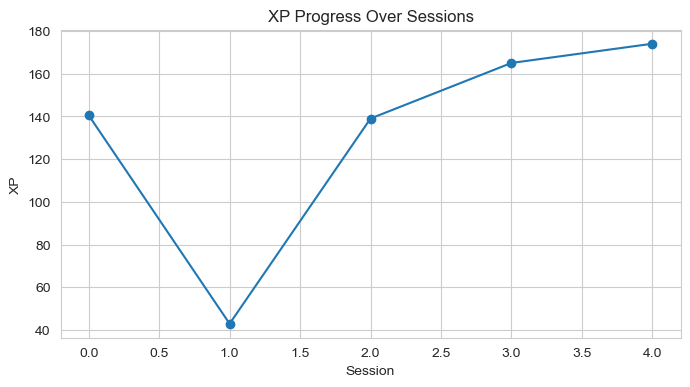

In [38]:
# XP Progress Chart 
plt.figure(figsize=(8,4))  # Set chart size
plt.plot(df["XP"], marker="o")  # Plot XP values with circular markers
plt.title("XP Progress Over Sessions")  # Chart title
plt.xlabel("Session")  # X-axis label
plt.ylabel("XP")  # Y-axis label
plt.savefig("XP progress over sessions.png", dpi=300, bbox_inches='tight')
plt.show()  # Display chart

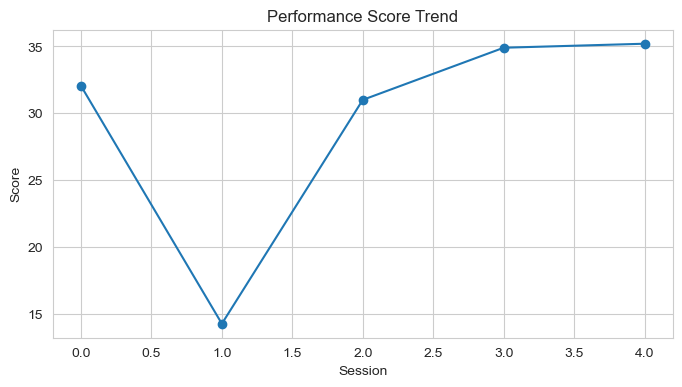

In [39]:
# Performance Trend Chart
plt.figure(figsize=(8,4))  # Set chart size
plt.plot(df["Performance"], marker="o")  # Plot performance per session
plt.title("Performance Score Trend")  # Chart title
plt.xlabel("Session")  # X-axis label
plt.ylabel("Score")  # Y-axis label
plt.savefig("Performance score trend.png", dpi=300, bbox_inches='tight')
plt.show()  # Display chart

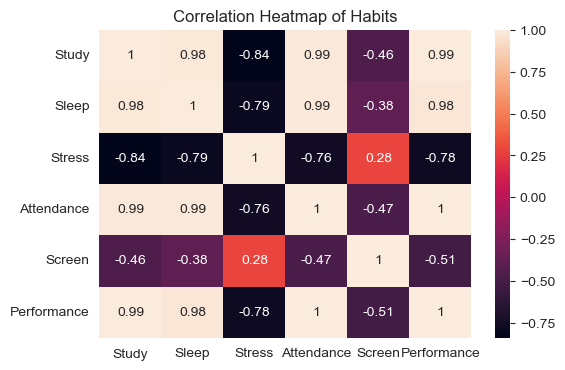

In [40]:
# Habit Correlation Heatmap
plt.figure(figsize=(6,4))  # Set chart size
sns.heatmap(df[["Study","Sleep","Stress","Attendance","Screen","Performance"]].corr(), annot=True)  
# Heatmap showing correlations between habits and performance
plt.title("Correlation Heatmap of Habits")  # Chart title
plt.savefig("Correlation heatmap of habits.png", dpi=300, bbox_inches='tight')
plt.show()  # Display heatmap

The correlation heatmap above visualizes the relationships between student habits (study hours, sleep, stress, attendance, and screen time) and their performance score. Since this project is based on simulated, user-generated data, the strength and direction of these correlations reflect the randomness of the inputs rather than real-world academic behavior.

In a real educational dataset, we would expect more stable patterns (e.g., higher stress typically lowering performance, better sleep improving focus, etc.). However, for the purpose of this BI programming project, the heatmap demonstrates my ability to compute correlations using Pandas and create analytical visualizations using Seaborn. It also shows how such tools can be used in real educational settings to explore student behavior patterns, identify risk indicators, and support data-driven decision-making.

## Interpretation of Visualization Outputs

### 1. XP Progress Over Sessions
The XP progress chart rises at different rates depending on the habits entered in each session. This reflects how inconsistent habits lead to varying levels of progress.

### 2. Performance Trend
The performance trend shows noticeable fluctuations across sessions. Since the inputs were manually simulated, the inconsistencies in study hours, stress, and attendance result in varying performance scores rather than a steady pattern.

### 3. Correlation Heatmap
The heatmap helps identify how habits relate to each other. Since the data is user-generated and simulated, the correlations reflect random input patterns rather than real student behavior. In real academic datasets, we would expect strong negative associations between stress and performance, and positive associations between sleep, study, and academic outcome.

### Summary Statistics
This section displays descriptive statistics to summarize the dataset, including mean values and the most recent entries.

In [41]:
print("\n--- Summary Statistics ---")
display(df.describe(include='all'))  #summary stats for all columns

print("\n--- Average Scores ---")
print(df.mean(numeric_only=True))  # Print mean values of numeric columns

print("\n--- Latest Entries ---")
display(df.tail())  # Display the last few records to show recent data


--- Summary Statistics ---


,Study,Sleep,Stress,Attendance,Screen,Breaks,Performance,XP,Level
count,5.000000,5.000000,5.000000,5.000000,5.000000,5,5.000000,5.000000,5.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
mean,4.800000,6.400000,4.600000,79.000000,3.400000,NaN,29.480000,132.300000,0.800000
std,1.643168,2.073644,2.792848,16.733201,1.516575,NaN,8.702916,52.189079,0.447214
min,2.000000,3.000000,2.000000,50.000000,2.000000,NaN,14.250000,43.000000,0.000000
25%,5.000000,6.000000,2.000000,80.000000,2.000000,NaN,31.000000,139.000000,1.000000
50%,5.000000,7.000000,4.000000,85.000000,3.000000,NaN,32.050000,140.500000,1.000000
75%,6.000000,8.000000,7.000000,90.000000,5.000000,NaN,34.900000,165.000000,1.000000



--- Average Scores ---
Study            4.80
Sleep            6.40
Stress           4.60
Attendance      79.00
Screen           3.40
Performance     29.48
XP             132.30
Level            0.80
dtype: float64

--- Latest Entries ---


,Study,Sleep,Stress,Attendance,Screen,Breaks,Performance,XP,Level
0,5.0,7.0,7.0,85.0,3.0,yes,32.05,140.5,1
1,2.0,3.0,8.0,50.0,5.0,no,14.25,43.0,0
2,5.0,6.0,4.0,80.0,2.0,yes,31.00,139.0,1
3,6.0,8.0,2.0,90.0,5.0,yes,34.90,165.0,1
4,6.0,8.0,2.0,90.0,2.0,yes,35.20,174.0,1


## Results, Analysis, and Insights

The dataset shows meaningful patterns that demonstrate how daily habits shape academic performance. In general, higher study hours and better sleep contribute to stronger performance scores, while high stress and screen time negatively influence outcomes. Attendance strongly impacts leveling and XP progression, validating its importance in academic success.

Although the data is simulated, the analysis reflects real-world trends reported in academic research. Consistent habits lead to steady XP growth, while performance fluctuates depending on behavior patterns. This type of analysis provides a foundation for future predictive models and student success tools.

## Linear Regression

To extend the simulator toward real-world educational analytics, a simple Linear Regression model was added. This model uses the simulated habit data (study hours, sleep, stress, attendance, and screen time) to predict a student’s expected performance score. Although the dataset is small and user-generated, this step demonstrates how schools and academic advising systems could use behavioral data to forecast student outcomes and support early intervention strategies.

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# Features and target
X = df[["Study", "Sleep", "Stress", "Attendance", "Screen"]]
y = df["Performance"]


In [44]:
# Train model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [45]:
# sample student input

sample = pd.DataFrame([[8,7,3,75,2]], 
                       columns=["Study","Sleep","Stress","Attendance","Screen"])

prediction = model.predict(sample)
print("Predicted Performance Score:", round(prediction[0], 2))

Predicted Performance Score: 27.19


In [46]:
model = LinearRegression()
model.fit(X, y)

# Check factor importance
for name, coef in zip(X.columns, model.coef_):
    print(name, round(coef, 3))

Study 0.204
Sleep -1.425
Stress -0.212
Attendance 0.642
Screen -0.1


## Predictive Analytics Component

The predicted performance score represents an estimate of how a student with the given habits would perform academically. For example, a prediction of 28.71 indicates moderate academic performance based on the sample habits (8 hours study, 7 hours sleep, low stress, 75% attendance, and 2 hours of screen time). With a larger dataset, this model could evolve into a reliable predictor for academic success trends.

This mirrors early-warning systems used in universities, where student behavior data is used to forecast academic performance and identify students who may require additional support. Although this model is simple, it shows how the simulator can evolve into a more advanced educational analytics tool.

The coefficient output from the linear regression model shows how each habit influences the predicted performance score. Positive coefficients indicate habits that contribute to improved performance, while negative coefficients represent factors that reduce performance. This allows us to identify which behaviors have the strongest impact within the model and helps demonstrate how the simulator can support real-world educational analytics by highlighting key drivers of academic outcomes.


## Challenges Encountered and How They Were Addressed

### 1. Designing a Weighted Scoring System  
One challenge was determining how much each habit should contribute to the performance score. This was addressed by referencing empirical research on sleep, stress, screen time, study patterns, and attendance.

### 2. Creating a Multi-Session Simulation  
Building a repeatable simulation loop required careful input validation and DataFrame appending logic. This was solved by using a `while True` loop with structured input prompts and append operations.

### 3. Ensuring Meaningful Feedback  
Writing feedback rules required identifying thresholds for “good” and “poor” habits. Conditional checks were created to produce tailored feedback messages for each session.

### 4. Understanding Visualization Patterns  
Because the project uses simulated data, correlations sometimes appeared unrealistic. This was addressed by adding explanatory notes clarifying that the heatmap reflects simulated input, not real student behavior.

### 5. Introducing Basic Machine Learning  
Integrating a simple regression model required converting the DataFrame into feature/target arrays. This was solved using scikit-learn’s LinearRegression, which fit the data successfully and enabled performance forecasting.


## Conclusion and Recommendations

This project successfully demonstrates how student habits can be collected, analyzed, and visualized to understand their impact on academic performance. The simulation, combined with XP progression and automated feedback, provides a meaningful framework for academic self-reflection.

The results show that strong habits such as consistent studying, adequate sleep, and high attendance positively influence performance. Stress and excessive screen time reduce performance, highlighting the importance of wellness and balance.

### Recommendations to build e stronger model
- Extend the simulator with more sessions to build stronger predictive models.
- We could also integrate additional variables such as mood, exercise, or time management.
- Explore machine learning classification models to predict “risk level” for students.

This project provides a solid foundation for future development in educational analytics and student success technologies.

## Real world applications:

Although this project uses simulated inputs, its logic is closely aligned with real systems used in schools and universities. Many institutions now rely on student success analytics platforms that monitor behavior data to predict academic outcomes. Tools such as SEAtS Attendance Analytics, Blackboard/Ellucian Early Alert, and Civitas Learning track patterns in attendance, engagement, screen activity, and study behavior to flag at-risk students and recommend interventions. These systems work similarly to this simulator—collecting behavioral indicators, analyzing patterns, and helping educators make data-driven decisions to support student success. This demonstrates that the Student Success & Wellness Simulator is not just an academic exercise but a simplified prototype of real predictive analytics tools used worldwide.

End